In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix as CM
import random

## Consine Distance

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [3]:
def IndOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]
#a=[3,4,6,2]
#print IndOfSortedFea(a)

In [4]:
def corDis(x,y):
    """
    calculate the correlation distance, given x and y calculate how similar the x and y is.
    return a value, 0 means x and y are independent, higher mean x are determinstic of y.
    """
    assert len(x)==len(y)
    n=len(x)
    a=np.zeros((n,n))
    b=np.zeros((n,n))
    ##calculate pair wise distance
    for i in xrange(n):
        for j in xrange(n):
            a[i,j]=np.linalg.norm(x[i]-x[j])
            b[i,j]=np.linalg.norm(y[i]-y[j])
    aRowMean=np.mean(a,axis=1)
    aColMean=np.mean(a,axis=0)
    bRowMean=np.mean(b,axis=1)
    bColMean=np.mean(b,axis=0)
    aMean=np.mean(a)
    bMean=np.mean(b)
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    ##normalization
    for i in xrange(n):
        for j in xrange(n):
            A[i,j]=a[i,j]-aRowMean[i]-aColMean[j]+aMean
            B[i,j]=b[i,j]-bRowMean[i]-bColMean[j]+bMean
    cordis=0.
    for i in xrange(n):
        for j in xrange(n):
            cordis += A[i,j]*B[i,j]
    return cordis*(1./n**2)

In [5]:
def cosine_distance(u, v):
    return np.dot(u, v) / (math.sqrt(np.dot(u, u)) * math.sqrt(np.dot(v, v)))

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()


In [7]:
def crossValidation(x,y):
    """
    version 2
    according to the true y, predict
    greedy algorithm: first using index
    return
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    svc=svm.SVC(kernel='linear')
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        svc.fit(x[train],y[train])
        prediction=svc.predict(x[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [8]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    numOfFeatures=xT.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(cosine_distance(xT[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [22]:
def pretrain(x,y):
    rank=[]
    numOfFeatures=x.shape[1]
    for i in xrange(numOfFeatures):
        rank.append(cosine_distance(x[:,i],y))
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation(x[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return x[:,feaSelected[:choice+1]],featureSelectedErrors,cms 

In [10]:
from matplotlib import pyplot as plt
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x[y == t,i],x[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [11]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [34]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i
        print 

In [109]:
digits=load_digits()
x=digits.data
y=digits.target

In [110]:
sample=random.sample(range(len(y)), int(len(y)*0.3))

In [111]:
x=x[sample]
y=y[sample]

In [112]:
print sample
print len(x),len(y)

[791, 871, 1139, 96, 360, 491, 1062, 799, 637, 1468, 140, 292, 778, 702, 339, 981, 1086, 373, 77, 330, 146, 423, 580, 856, 1516, 1582, 1318, 1479, 1727, 854, 927, 1792, 361, 216, 233, 1466, 438, 34, 1148, 1663, 693, 45, 301, 1226, 1241, 1122, 749, 1796, 718, 8, 609, 618, 90, 444, 1526, 1240, 1681, 474, 1047, 1225, 1691, 1534, 668, 880, 738, 1149, 1041, 685, 1618, 1143, 643, 699, 1532, 1313, 560, 1394, 1166, 1574, 443, 1626, 999, 1232, 769, 1682, 816, 98, 648, 1335, 36, 1208, 183, 1561, 1253, 1109, 109, 450, 777, 1111, 127, 1031, 1188, 973, 1442, 1006, 1152, 264, 546, 1292, 1008, 398, 1236, 1003, 1684, 923, 882, 755, 196, 1560, 835, 986, 121, 1035, 79, 1459, 503, 463, 1128, 707, 673, 1195, 363, 919, 353, 892, 641, 1270, 328, 347, 974, 851, 522, 119, 539, 583, 1107, 1117, 136, 1513, 822, 748, 124, 1759, 163, 391, 305, 164, 1179, 1458, 910, 1514, 1392, 941, 590, 219, 530, 240, 1675, 1347, 1405, 1586, 1720, 1703, 1390, 193, 525, 1213, 1599, 613, 1770, 120, 470, 203, 1183, 125, 31, 186, 39,

In [113]:
result,error,cm=pretrain(x,y)

C:\Users\zc\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from IPython.kernel.zmq import kernelapp as app


In [114]:
printCM(cm)

[[ 9  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  2  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  1  6  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0 13  1  0]
 [ 0  1  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  1 16]]

[[ 9  0  0  0  1  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  1  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  1]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  1  0  0  0  0  0  6]]

[[11  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  1 10  1  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  1  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  9]]

[[10

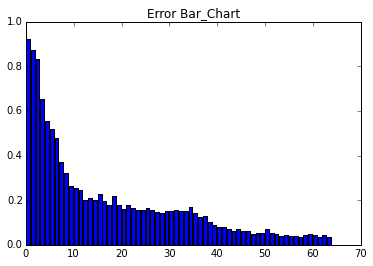

In [115]:
plotErr(error)

In [116]:
print result.shape

(539L, 64L)


In [117]:
result1,e1,cm1=layer_rbf(result,y)
printCM(cm1)

[[ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]]

[[ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]]

[[ 0  0  1  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  2  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  1  0  0  0 10  0  0  0  0]
 [ 0  0  4  0  0 11  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0]
 [ 0  0  1  0  0 13  0  0  0  0]]

[[ 0

C:\Users\zc\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from IPython.kernel.zmq import kernelapp as app


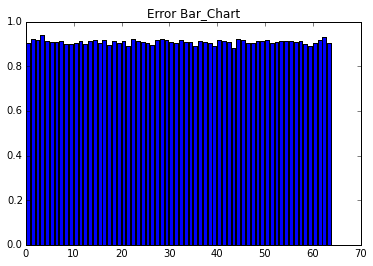

In [118]:
plotErr(e1)

In [119]:
print result1.shape

(539L, 44L)


In [120]:
result2,e2,cm2=layer_rbf(result1,y)
printCM(cm2)

[[ 2  0  1  0  0  0  0  1  0  2]
 [ 2  0  0  0  0  4  0  2  1  1]
 [ 2  0  3  0  0 10  0  1  0  1]
 [ 0  0  1  0  0  5  0  0  2  1]
 [ 1  0  2  0  0  6  0  0  0  0]
 [ 2  0  1  0  0  6  0  0  1  1]
 [ 3  1  1  0  0  3  0  0  0  0]
 [ 5  0  2  0  0  5  0  1  0  1]
 [ 0  0  2  0  0  6  0  0  1  2]
 [ 1  1  1  0  0  7  0  0  1  2]]

[[ 0  0  4  0  1  0  0  4  0  2]
 [ 0  0  6  0  0  0  0  1  1  4]
 [ 0  1  7  0  1  0  0  1  0  4]
 [ 0  0  5  0  0  1  0  3  0  1]
 [ 0  0  2  0  0  0  0  2  0  0]
 [ 0  0 10  0  0  0  0  1  0  4]
 [ 0  0  7  0  0  0  0  2  1  3]
 [ 0  0  3  0  0  0  0  4  0  0]
 [ 0  0  7  0  0  0  0  2  0  3]
 [ 0  0  5  0  0  0  0  2  0  3]]

[[ 0  0  7  0  0  0  0  0  3  2]
 [ 0  0  9  0  0  0  0  0  2  5]
 [ 0  0  6  0  0  1  0  0  1  2]
 [ 0  0  5  0  0  0  0  0  0  2]
 [ 0  0  6  0  0  0  0  0  1  2]
 [ 0  0 10  0  0  0  0  0  2  0]
 [ 0  0  6  0  0  1  0  0  1  2]
 [ 0  0 11  0  0  0  0  0  3  0]
 [ 0  0  4  0  0  0  0  0  1  3]
 [ 0  0  5  0  0  0  0  0  4  1]]

[[0 

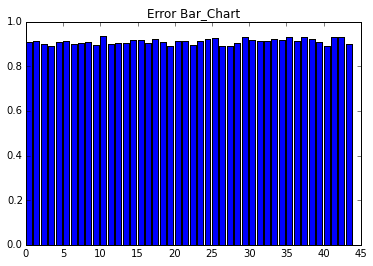

In [121]:
plotErr(e2)

In [122]:
print result2.shape

(539L, 27L)


In [123]:
result3,e3,cm3=layer_rbf(result2,y)
printCM(cm3)

[[ 0  1  4  0  0  0  0  7  0  0]
 [ 0  0  3  0  0  0  0  3  0  0]
 [ 0  1  4  0  0  0  0  8  0  0]
 [ 0  1  3  0  0  0  0  5  0  0]
 [ 0  0  3  0  0  0  0  4  0  0]
 [ 0  2  4  0  0  0  0 10  0  0]
 [ 0  0  3  0  0  0  0  6  0  1]
 [ 0  1  1  0  0  0  0  8  0  0]
 [ 0  0  3  0  0  0  0 11  0  0]
 [ 0  1  6  0  0  0  0  4  0  0]]

[[ 0  0  1  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  1]
 [ 0  0  0  0  0  7  0  1  0  6]
 [ 0  0  1  0  0 10  0  0  0  2]
 [ 0  0  0  0  0  5  0  0  0  1]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  2]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  7  0  1  0  5]
 [ 0  0  0  0  0  9  0  0  0  2]]

[[ 0  0  6  0  0  0  0  3  0  2]
 [ 0  0  4  0  0  0  0  3  0  1]
 [ 0  0  5  0  0  0  0  1  0  0]
 [ 0  0  6  0  0  0  0  3  0  0]
 [ 0  0  8  0  0  0  0  3  0  0]
 [ 0  0 13  0  0  0  0  3  0  1]
 [ 0  0  7  0  0  0  0  4  0  0]
 [ 0  0  9  0  0  0  0  6  0  0]
 [ 0  0  7  0  0  0  0  1  1  0]
 [ 0  0  7  0  0  0  0  4  0  0]]

[[ 0

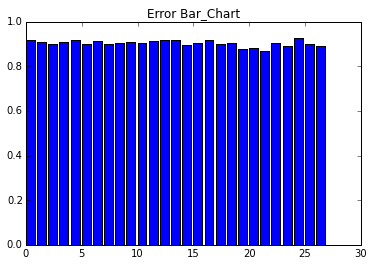

In [124]:
plotErr(e3)

In [125]:
print result3.shape

(539L, 22L)


In [126]:
result4,e4,cm4=layer_rbf(result3,y)
printCM(cm4)

[[ 0  1  7  0  0  0  0  3  0  1]
 [ 1  1  5  0  0  2  0  0  0  3]
 [ 0  0  4  0  0  4  0  0  0  0]
 [ 0  0  5  0  0  1  0  2  0  1]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  1 11  0  0  1  0  1  0  0]
 [ 0  1  7  0  0  0  0  2  0  2]
 [ 0  2  4  0  0  4  0  4  0  1]
 [ 0  0  9  0  0  1  0  3  0  1]
 [ 0  0  3  0  0  0  0  1  0  0]]

[[ 0  1  5  0  0  1  0  4  0  1]
 [ 0  1  2  0  0  1  0  1  0  0]
 [ 0  1 10  0  0  0  0  2  0  0]
 [ 0  0  6  0  0  1  0  4  0  0]
 [ 0  1  3  0  0  1  0  1  0  0]
 [ 1  2  7  0  0  0  0  3  0  0]
 [ 0  3  3  0  0  1  0  3  0  0]
 [ 3  0  6  0  0  1  0  2  0  0]
 [ 0  1  6  0  0  2  0  2  0  1]
 [ 0  1 11  0  0  2  0  0  0  0]]

[[0 1 5 0 0 0 0 2 1 1]
 [0 0 5 0 0 1 0 5 1 0]
 [0 0 8 0 0 2 0 5 2 0]
 [0 0 6 0 0 0 0 5 0 1]
 [0 0 6 0 0 1 0 2 0 0]
 [0 0 4 0 1 0 0 3 2 1]
 [0 0 5 0 0 0 0 2 0 0]
 [0 0 3 0 0 0 0 3 2 1]
 [0 0 3 0 0 3 0 0 1 0]
 [0 0 9 0 1 0 0 2 2 0]]

[[1 0 2 0 0 1 0 2 0 5]
 [0 0 6 0 0 1 0 1 1 3]
 [0 0 7 0 0 0 0 0 0 5]
 [0 1 0 0 0 1 0 2 0 3]
 [0 0 3 0 0 

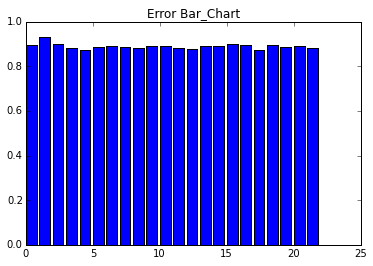

In [127]:
plotErr(e4)

In [128]:
print result4.shape

(539L, 18L)


In [129]:
result5,e5,cm5=layer_rbf(result4,y)
printCM(cm5)

[[ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  6  0  0  0  0 10  0  0]
 [ 1  0  4  0  0  0  0  9  0  0]
 [ 0  0  1  0  0  0  0  6  0  0]
 [ 0  0  6  0  0  1  0  4  1  0]
 [ 1  0  3  0  0  0  0  5  0  0]
 [ 1  0  4  0  0  0  0  3  1  1]
 [ 1  0  0  0  0  2  0  4  0  0]
 [ 0  0  3  0  0  0  0 10  1  0]
 [ 1  0  6  0  0  1  0  4  1  0]]

[[0 0 9 0 0 1 0 6 0 0]
 [0 0 0 0 0 0 0 5 0 1]
 [0 0 3 0 0 1 0 5 0 3]
 [0 0 1 0 0 1 0 2 0 3]
 [0 0 2 0 0 0 0 2 0 0]
 [0 0 4 0 0 1 0 3 0 4]
 [0 0 1 0 0 1 0 5 0 3]
 [0 0 2 0 0 1 0 8 0 1]
 [0 0 3 0 1 1 0 7 2 1]
 [0 1 2 0 0 0 0 7 0 4]]

[[ 0  0  1  0  0  0  0  0  6  6]
 [ 0  0  1  0  0  0  0  0  6  5]
 [ 0  0  2  0  1  0  0  0  4  5]
 [ 0  0  2  0  1  0  0  0  4  2]
 [ 0  0  1  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  1 11  5]
 [ 0  0  4  0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0  1 11  1]
 [ 0  0  1  0  0  0  0  1  1  3]
 [ 0  0  2  0  0  0  0  0  6  2]]

[[ 0  0  1  0  0  4  0  0  0  1]
 [ 0  0  0  0  0  6  0  1  0  2]
 [ 1  0  0  0  0 10  0  2  1  3]
 [ 0 

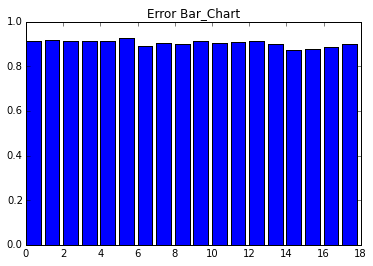

In [130]:
plotErr(e5)

In [131]:
print result5.shape

(539L, 15L)


In [132]:
result6,e6,cm6=layer_rbf(result5,y)
printCM(cm5)

[[ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  6  0  0  0  0 10  0  0]
 [ 1  0  4  0  0  0  0  9  0  0]
 [ 0  0  1  0  0  0  0  6  0  0]
 [ 0  0  6  0  0  1  0  4  1  0]
 [ 1  0  3  0  0  0  0  5  0  0]
 [ 1  0  4  0  0  0  0  3  1  1]
 [ 1  0  0  0  0  2  0  4  0  0]
 [ 0  0  3  0  0  0  0 10  1  0]
 [ 1  0  6  0  0  1  0  4  1  0]]

[[0 0 9 0 0 1 0 6 0 0]
 [0 0 0 0 0 0 0 5 0 1]
 [0 0 3 0 0 1 0 5 0 3]
 [0 0 1 0 0 1 0 2 0 3]
 [0 0 2 0 0 0 0 2 0 0]
 [0 0 4 0 0 1 0 3 0 4]
 [0 0 1 0 0 1 0 5 0 3]
 [0 0 2 0 0 1 0 8 0 1]
 [0 0 3 0 1 1 0 7 2 1]
 [0 1 2 0 0 0 0 7 0 4]]

[[ 0  0  1  0  0  0  0  0  6  6]
 [ 0  0  1  0  0  0  0  0  6  5]
 [ 0  0  2  0  1  0  0  0  4  5]
 [ 0  0  2  0  1  0  0  0  4  2]
 [ 0  0  1  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  1 11  5]
 [ 0  0  4  0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0  1 11  1]
 [ 0  0  1  0  0  0  0  1  1  3]
 [ 0  0  2  0  0  0  0  0  6  2]]

[[ 0  0  1  0  0  4  0  0  0  1]
 [ 0  0  0  0  0  6  0  1  0  2]
 [ 1  0  0  0  0 10  0  2  1  3]
 [ 0 

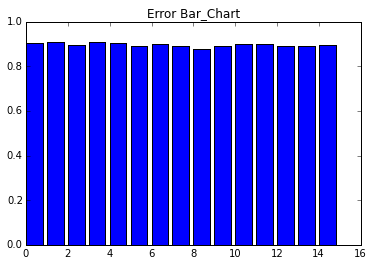

In [133]:
plotErr(e6)

In [134]:
print result6.shape

(539L, 9L)


In [135]:
result7,e7,cm7=layer_rbf(result6,y)
printCM(cm7)

[[ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  1  0  0]
 [ 0  0  3  0  0  0  0  1  0  0]
 [ 0  0  7  0  0  0  0  0  0  1]
 [ 0  0  9  0  0  0  0  2  0  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  1  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0]
 [ 1  0 13  0  0  0  0  0  0  0]]

[[0 0 1 0 1 5 0 0 0 0]
 [3 0 0 0 2 7 0 1 0 0]
 [5 0 0 0 1 9 1 0 0 2]
 [2 0 0 0 1 6 0 0 0 3]
 [0 0 0 0 0 7 0 0 0 0]
 [3 0 0 0 1 4 0 0 0 1]
 [2 0 0 0 1 1 0 0 0 3]
 [2 0 0 0 0 8 0 1 0 1]
 [2 0 0 0 0 8 0 0 0 1]
 [5 0 0 0 2 3 1 0 0 1]]

[[0 0 7 0 0 1 0 2 0 4]
 [0 0 3 1 0 2 0 1 1 3]
 [0 3 3 0 0 1 0 1 1 2]
 [0 0 1 0 0 0 0 2 1 0]
 [0 0 3 1 0 0 0 4 2 0]
 [0 0 4 1 0 1 0 3 3 3]
 [0 0 6 0 0 0 0 1 1 2]
 [0 1 6 0 0 2 0 3 0 1]
 [0 0 2 0 0 3 0 1 1 0]
 [0 1 5 0 0 0 0 3 2 2]]

[[0 0 1 0 0 0 0 5 0 5]
 [1 0 0 0 0 2 0 5 0 2]
 [0 0 3 0 0 4 0 7 0 6]
 [0 0 0 0 0 1 0 3 0 3]
 [0 0 1 0 0 3 0 1 0 4]
 [0 0 0 0 0 3 0 5 0 0]
 [1 0 1 0 0 2 0 5 0 0]
 [1 0 0 0 0 2 0 1 0 0]
 [1 0 1 0 0 6 0 6 0 

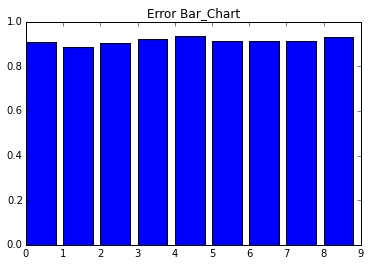

In [136]:
plotErr(e7)

In [137]:
print result7.shape

(539L, 2L)
